## Observable Trends
1. Capomulin treatment presented a decrease in Tumor Volume by 19.4% over the 45 day span
    and is the only drug out of the 4 selected treatments that showed signs of tumor reduction.
2. The number of Metastatic sites increased in all 4 drug treatments. Even though Capomulin 
    treatment reduced tumor volume, metastatis still occured. This shows Capomulin treatment 
    is likely ineffective at stopping the spread of cancer. Capomulin treatment was able to
    target the tumor directly, but still allowed for the production of Mestastic cells.
3. The number of mice that survived the 45 day span for Infubinol was worse than the Placebo,
    while Ketapril resulted in an equal survival rate.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#merge dataframes
clinical_data = pd.read_csv('raw_data/clinicaltrial_data.csv')
drug_data = pd.read_csv('raw_data/mouse_drug_data.csv')
df = pd.merge(clinical_data, drug_data, how='right', on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
#set a list that contains the specific drugs we want to analyze
las_vegas = ['Capomulin','Infubinol','Ketapril','Placebo']    

In [3]:
#Create a dataframe of the mean for Tumor Volume and Metastatic sites of the sample of mice for each time point
mean_df = df.groupby(['Drug','Timepoint']).mean()
mean_df = mean_df.reset_index()
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [4]:
#Create a dataframe of the Standard Error of the Mean for Tumor Volume and 
#   Metastatic sits for the sample of mice for each Timepoint. This provides us with our error bars.
sem_df = df.groupby(['Drug','Timepoint']).sem()
sem_df = sem_df.drop(columns='Mouse ID', axis=1).reset_index()
sem_df.head()

,Drug,Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.074833,0.448593
2,Capomulin,10,0.125433,0.702684
3,Capomulin,15,0.132048,0.838617
4,Capomulin,20,0.161621,0.909731


In [5]:
mean_pivot1 = mean_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
mean_pivot = mean_pivot1.reset_index()
sem_pivot = sem_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
sem_pivot = sem_pivot.reset_index()

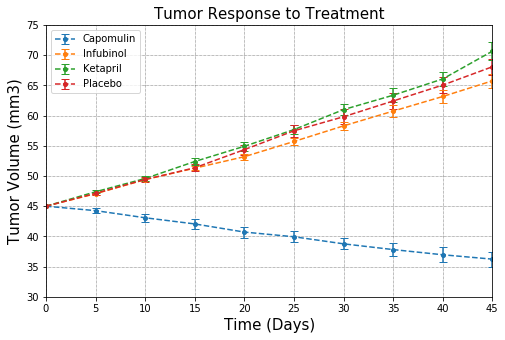

In [6]:
plt.figure(figsize=(8,5))

plt.xlim(0,45)
plt.ylim(30,75)
plt.title("Tumor Response to Treatment", fontsize=15)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)

#Loop through list of drugs to plot
for fear_and_loathing in las_vegas:
    plt.errorbar(mean_pivot.Timepoint, mean_pivot[fear_and_loathing], 
                 sem_pivot[fear_and_loathing], fmt='2', 
                 linestyle='--', marker='.', markersize=8,capsize=4)                
plt.legend(mean_pivot[las_vegas])
plt.show()

In [7]:
#Using same grouby as above, I adjusted the code to look towards the Metastatic Sites column.
meta_mean_pivot = mean_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
meta_mean_pivot = meta_mean_pivot.reset_index()
meta_sem_pivot = sem_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
meta_sem_pivot = meta_sem_pivot.reset_index()

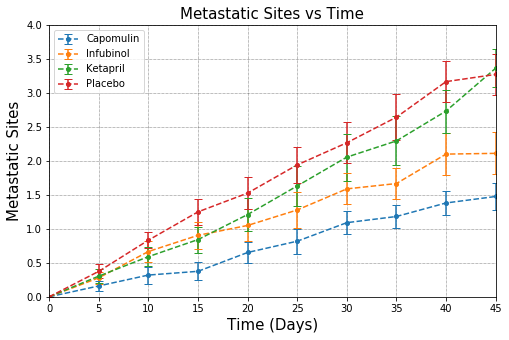

In [8]:
plt.figure(figsize=(8,5))
plt.xlim(0,45)
plt.ylim(0,4)
plt.title("Metastatic Sites vs Time", fontsize=15)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Metastatic Sites', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)

#Loop through list of drugs to plot
for fear_and_loathing in las_vegas:
    plt.errorbar(meta_mean_pivot.Timepoint, meta_mean_pivot[fear_and_loathing], 
                 meta_sem_pivot[fear_and_loathing], fmt='2', linestyle='--', 
                 marker='.', markersize=8, capsize=4)              
plt.legend(meta_mean_pivot[las_vegas])
plt.show()

In [9]:
#Create a Dataframe of the average number of mice for each drug at each timepoint.
mouse_count_df = df.groupby(['Drug','Timepoint']).count()
mouse_count_df = mouse_count_df.drop(columns={'Tumor Volume (mm3)',
                                              'Metastatic Sites'}).reset_index()
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint', columns='Drug', 
                                        values='Mouse ID')
mouse_count_pivot = (mouse_count_pivot/mouse_count_pivot.iloc[0]*100).reset_index()
mouse_count_pivot

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,26.923077,80.0,42.307692,56.0


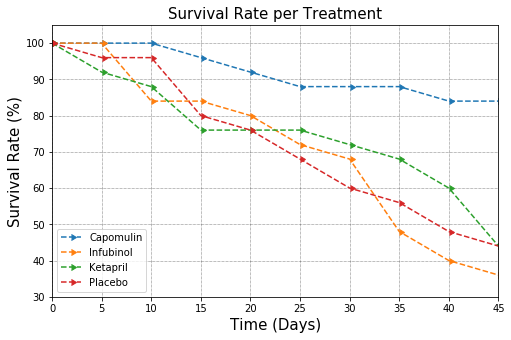

In [10]:
#plot the dataframe for the selected treatments
plt.figure(figsize=(8,5))

plt.xlim(0,df.Timepoint.max())
plt.ylim(30,105)
plt.title("Survival Rate per Treatment", fontsize=15)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Survival Rate (%)', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)

#Loop through list of drugs to plot
for fear_and_loathing in las_vegas:
    plt.errorbar(mouse_count_pivot.Timepoint, mouse_count_pivot[fear_and_loathing],
                linestyle='--', marker=9)
                
plt.legend(mouse_count_pivot[las_vegas])
plt.show()

In [11]:
change_mean_pivot = mean_pivot1 - mean_pivot1.shift(1)
change_series = change_mean_pivot.sum()/mean_pivot1.iloc[0]*100

In [12]:
height=[]
for i, v in change_series.iteritems():
    for fear_and_loathing in las_vegas:
        if fear_and_loathing == i:
            height.append(v)

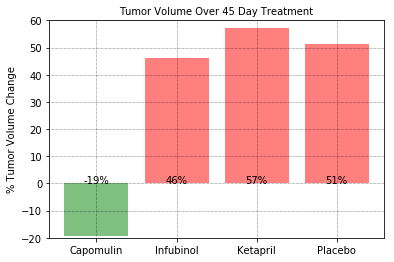

In [14]:
plt.ylim(-20,60)
plt.title("Tumor Volume Over 45 Day Treatment", fontsize=10)
plt.ylabel('% Tumor Volume Change', fontsize=10)
plt.grid(color='k', linestyle=':', linewidth=.5)
#clrs  = [clrred if pwval[x] >= pwlim[x] else clrgrn for x in range(ndays)]
red = 'red'
green = 'green'
colors = [red if height[x] > 0 else green for x in range(0,len(height))]
tumor_bar = plt.bar(las_vegas, height, align='center', alpha=0.5, color=colors)

def sizelabel(bars):
     for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x()+ bar.get_width()/2.,height-height,'%d' % int(height) +"%",
                ha='center', va='baseline')
sizelabel(tumor_bar)